In [9]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [10]:
column_names = [
    "ID", "Diagnosis",
    "radius1", "texture1", "perimeter1", "area1", "smoothness1", "compactness1", "concavity1", "concave_points1", "symmetry1", "fractal_dimension1",
    "radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2", "concavity2", "concave_points2", "symmetry2", "fractal_dimension2",
    "radius3", "texture3", "perimeter3", "area3", "smoothness3", "compactness3", "concavity3", "concave_points3", "symmetry3", "fractal_dimension3"
]
import pandas as pd

df = pd.read_csv("wdbc.csv", header=None, names=column_names)
output_path = "D:\ml\ass4\diagnostic\diabetes.csv"
df.to_csv(output_path, index=False)
from google.colab import files
files.download(output_path)

print(f"Saved successfully to: {output_path}")


<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-684899759.py:10: SyntaxWarning: invalid escape sequence '\m'
  output_path = "D:\ml\ass4\diagnostic\diabetes.csv"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved successfully to: D:\mlss4\diagnostic\diabetes.csv


/tmp/ipython-input-1980949047.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df, palette='pastel')


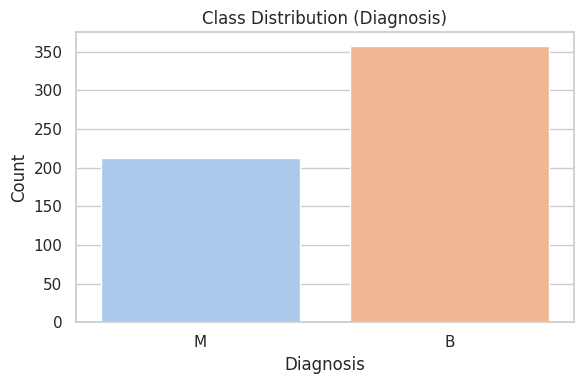

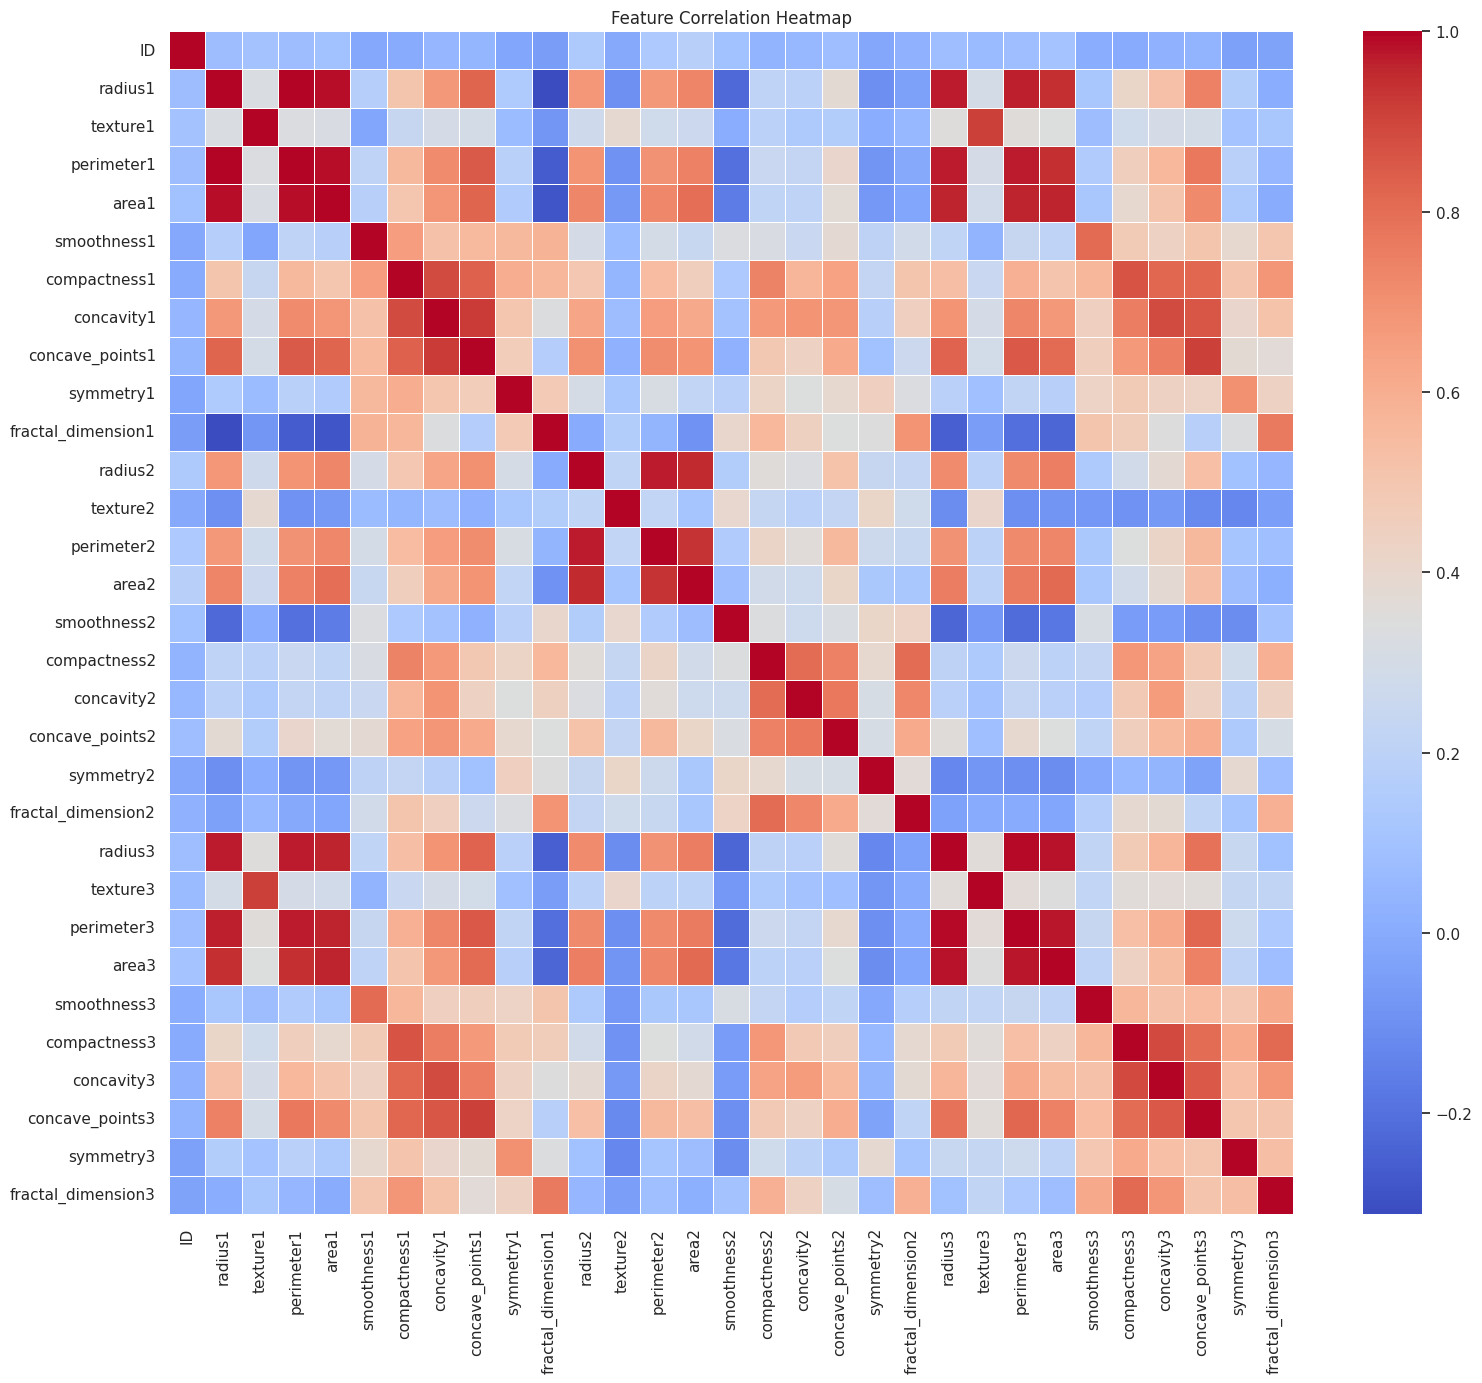

 Top 5 most correlated feature pairs:
perimeter1  radius1       0.997855
perimeter3  radius3       0.993708
area1       radius1       0.987357
            perimeter1    0.986507
area3       radius3       0.984015
dtype: float64


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set visual style
sns.set(style="whitegrid")

# ------------------------------
# 1. Class Balance (Diagnosis)
# ------------------------------
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df, palette='pastel')
plt.title("Class Distribution (Diagnosis)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ------------------------------
# 2. Correlation Heatmap
# ------------------------------
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# ------------------------------
# 3. Top 5 Correlated Feature Pairs
# ------------------------------
# Extract upper triangle without diagonal
corr_pairs = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
top_corr = corr_pairs.unstack().dropna().abs().sort_values(ascending=False).head(5)

print(" Top 5 most correlated feature pairs:")
print(top_corr)




In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


label_encoder = LabelEncoder()
df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])  # M=1, B=0

# Split features and target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split the dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check shapes
print("Training set:", X_train_scaled.shape)
print("Test set:", X_test_scaled.shape)


Training set: (398, 31)
Test set: (171, 31)


 Accuracy: 0.9122807017543859

 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       107
           1       0.93      0.83      0.88        64

    accuracy                           0.91       171
   macro avg       0.92      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



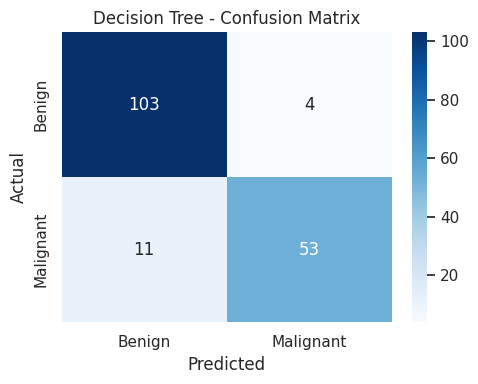

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predict
y_pred = dt_model.predict(X_test_scaled)

# Evaluate
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Decision Tree - Confusion Matrix")
plt.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize base model
dt_model = DecisionTreeClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit on training data (use scaled data)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Accuracy: 0.9445886075949368


In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Best model from grid search
best_dt = grid_search.best_estimator_

# Define 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
accuracies = []

for train_index, test_index in skf.split(X, y):
    # Split data
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Scale data if you used scaling
    # (assuming you had a scaler already fit in pipeline)
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_test_fold_scaled = scaler.transform(X_test_fold)

    # Train on current fold
    best_dt.fit(X_train_fold_scaled, y_train_fold)

    # Predict
    y_pred_fold = best_dt.predict(X_test_fold_scaled)

    # Accuracy
    acc = accuracy_score(y_test_fold, y_pred_fold)
    accuracies.append(acc)

    print(f"\n===== Fold {fold} =====")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test_fold, y_pred_fold))

    # Confusion Matrix
    cm = confusion_matrix(y_test_fold, y_pred_fold)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.tight_layout()
    plt.show()

    fold += 1

# Print overall summary
print("\n==== Cross-validation Summary ====")
print("Accuracies per fold:", accuracies)
print("Mean Accuracy:", np.mean(accuracies))
print("Std Deviation:", np.std(accuracies))


KeyError: "None of [Index([  1,   2,   3,   4,   5,   6,   7,   9,  10,  11,\n       ...\n       558, 559, 560, 561, 562, 563, 565, 566, 567, 568],\n      dtype='int64', length=455)] are in the [columns]"

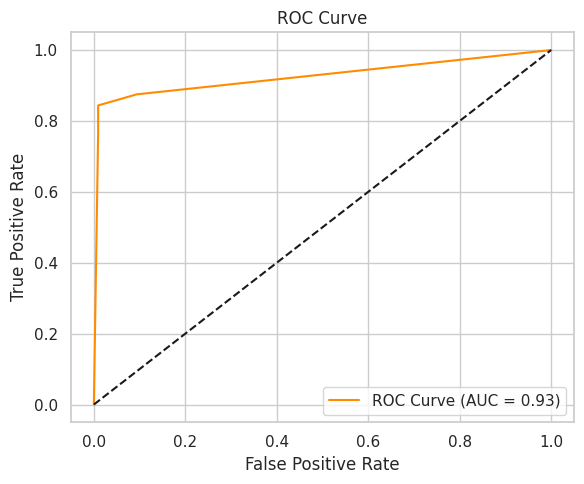

In [16]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for class 1 (Malignant)
y_test_proba = best_dt.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
